In [56]:
# Authors: Daelon Kingore, Ashton Barnwell, Jacob Albrecht
# Stock Market prediction using Data Mining/AI algorithms

"""
TODO: IDK man maybe clean the cells up and add comments. Possibly try to improve the models or add your own model(s).
Could always make/improve the graphs.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV

# set global dpiAmount for graph renders
dpiAmount = 200

# gather data from csv
ticker = "EXPE"
data = pd.read_csv(f'{ticker}.csv')

# drop unnecessary data (can maybe use it in some models but we'll see)
data = data.drop(["Adj Close"], axis=1)
data = data.drop(["Date"], axis=1)
data = data.drop(["Volume"], axis=1)

# standardize data to allow more efficient and accurate processing
standardizer = StandardScaler()
dataStandardized = standardizer.fit_transform(data)

# find y by seeing if next day is up or down
yRegress = data["Close"]

# using the train test split function. Using both regression and classification for right now
xTrain, xTest, yTrainRegress, yTestRegress = train_test_split(dataStandardized, yRegress, test_size=0.25, shuffle=False)
yTrainClass = np.where(yTrainRegress.shift(-1) > yTrainRegress, "Up", "Down")
yTestClass = np.where(yTestRegress.shift(-1) > yTestRegress, "Up", "Down")

In [57]:
def getColors(real, pred):
    if real == pred:
        return "green"
    else:
        return "red"
    
def getSymbols(pred):
    if pred == 'Up':
        return 6
    else:
        return 7

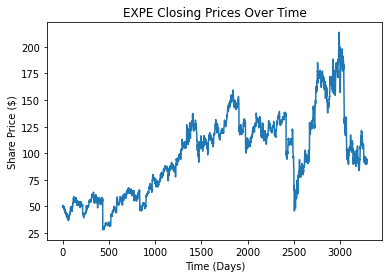

In [58]:
# view our starting data
plt.plot(data['Close'])
plt.title(f"{ticker} Closing Prices Over Time")
plt.xlabel("Time (Days)")
plt.ylabel("Share Price ($)")
plt.show()

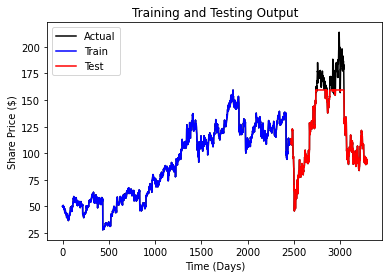

In [59]:
# Random Forest Model using regression (finding actual predicted values)
randomForests = RandomForestRegressor(n_estimators=250, max_depth=9, bootstrap=False)
rFRegress = randomForests.fit(xTrain, yTrainRegress)
trainrFPredict = rFRegress.predict(xTrain)
yRFPredict = rFRegress.predict(xTest)

testPredictPlot = np.empty_like(data['Close'])
testPredictPlot[:] = np.nan
testPredictPlot[len(trainrFPredict):len(data)] = yRFPredict

# Plot the test predictions
plt.plot(data['Close'], color="black", label=f"Actual")
plt.plot(trainrFPredict, color="blue", label=f"Train")
plt.plot(testPredictPlot, color="red", label=f"Test")
plt.title("Training and Testing Output")
plt.xlabel("Time (Days)")
plt.ylabel("Share Price ($)")
plt.legend()
plt.show()

0.511543134872418


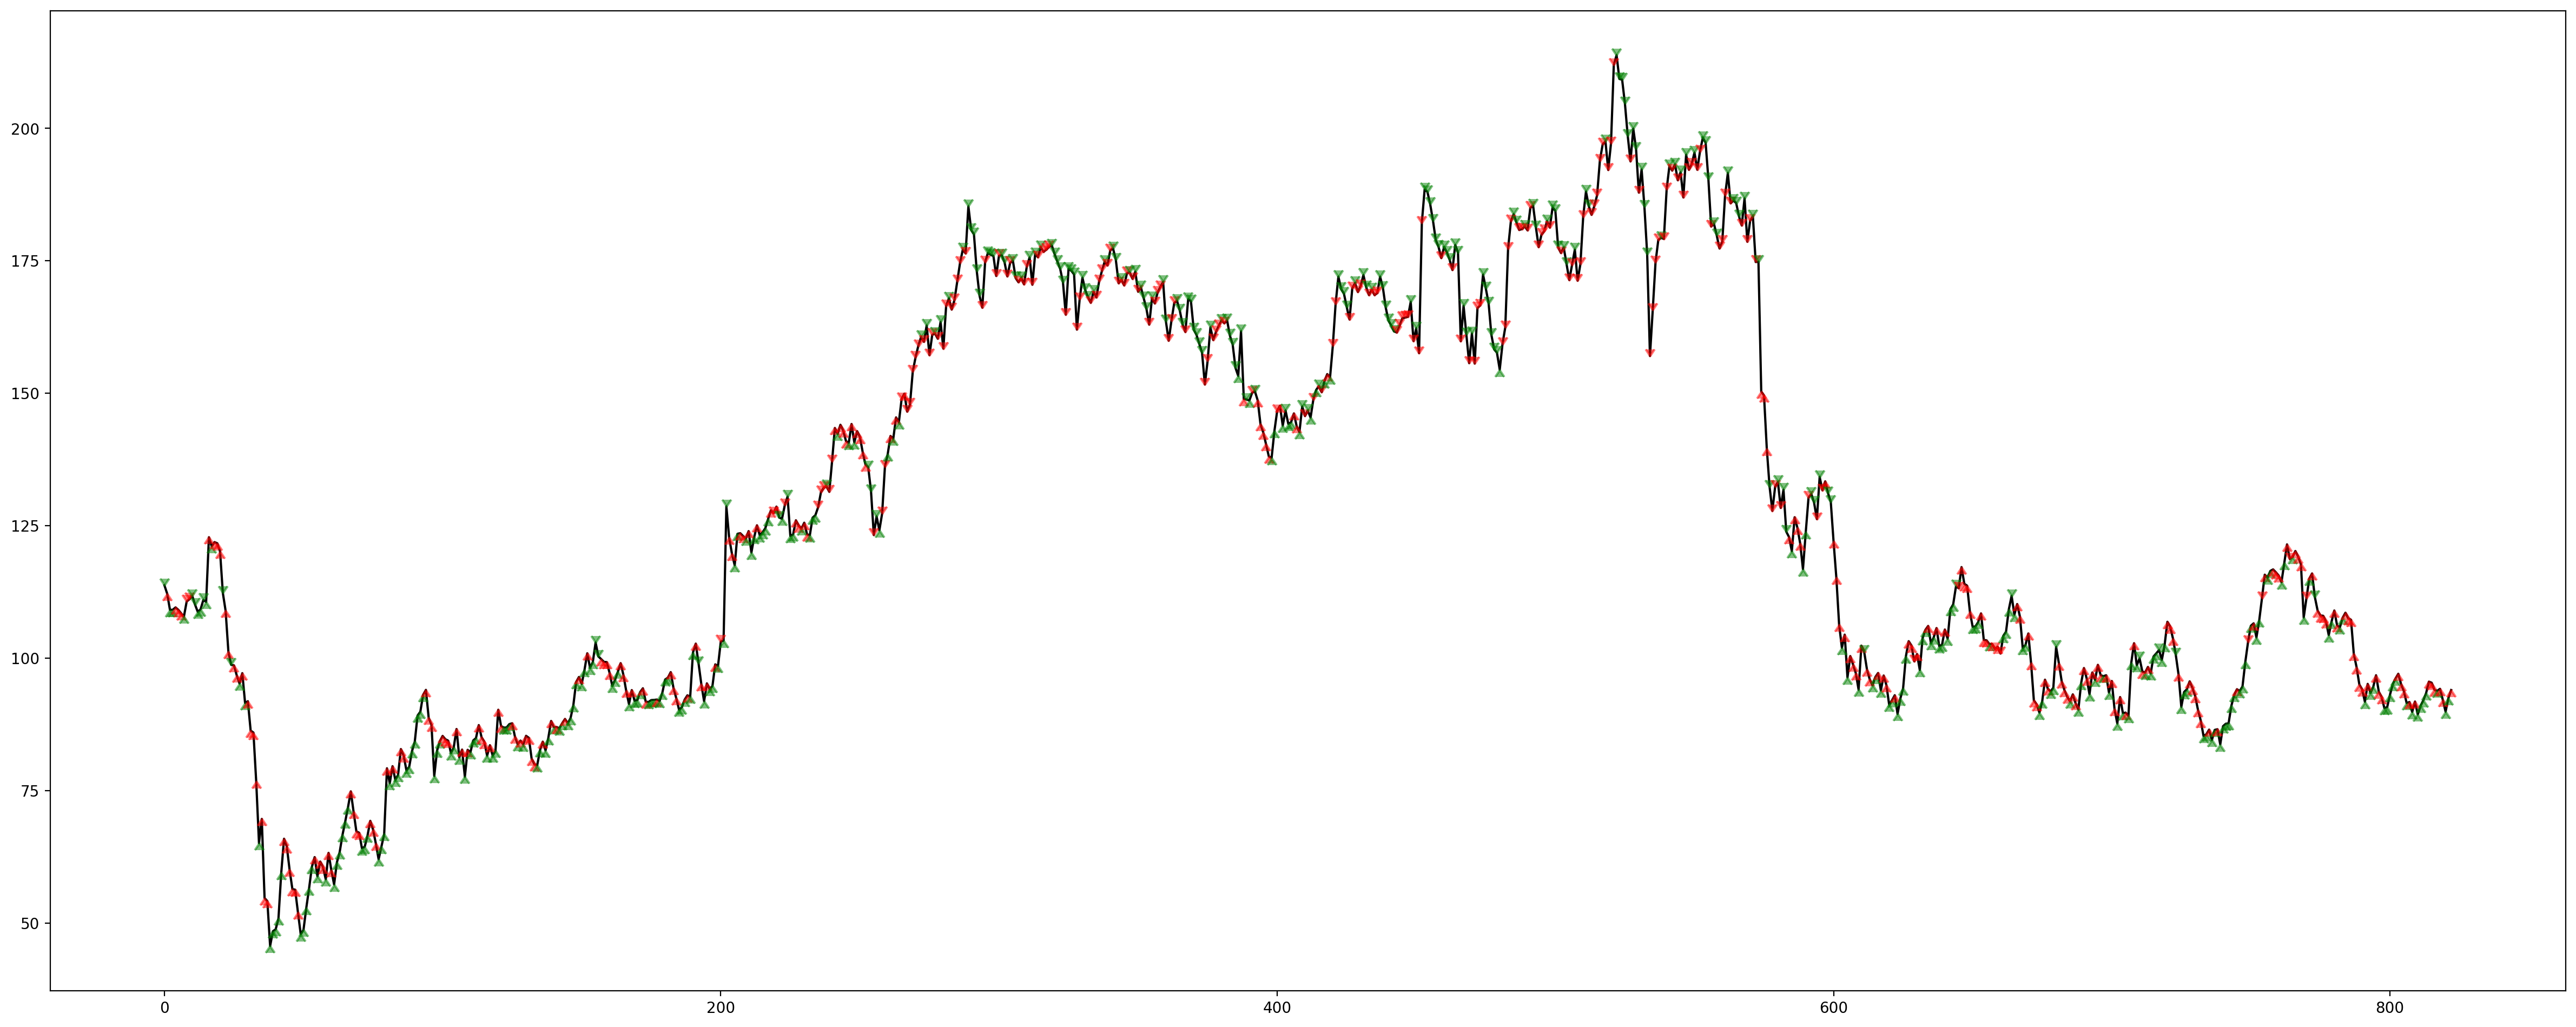

In [60]:
# Random Forest Model using classification (whether it goes up or down)
randomForests = RandomForestClassifier(n_estimators=250, max_depth=9, bootstrap=False)
rFModel = randomForests.fit(xTrain, yTrainClass)
yRandomForestsPredict = rFModel.predict(xTest)
rfAccuracy = accuracy_score(yTestClass, yRandomForestsPredict)
print(rfAccuracy)

plt.figure(figsize=(30,12), dpi=dpiAmount)
data2 = data['Close'].iloc[-len(yTestClass):]
plt.plot(data2.reset_index(drop=True), color='black')
for idx, i in enumerate(data['Close'].iloc[-len(yTestClass):]):
    plt.scatter(idx, i, marker=getSymbols(yRandomForestsPredict[idx]), color=getColors(yTestClass[idx], yRandomForestsPredict[idx]), zorder=2, alpha=0.5)


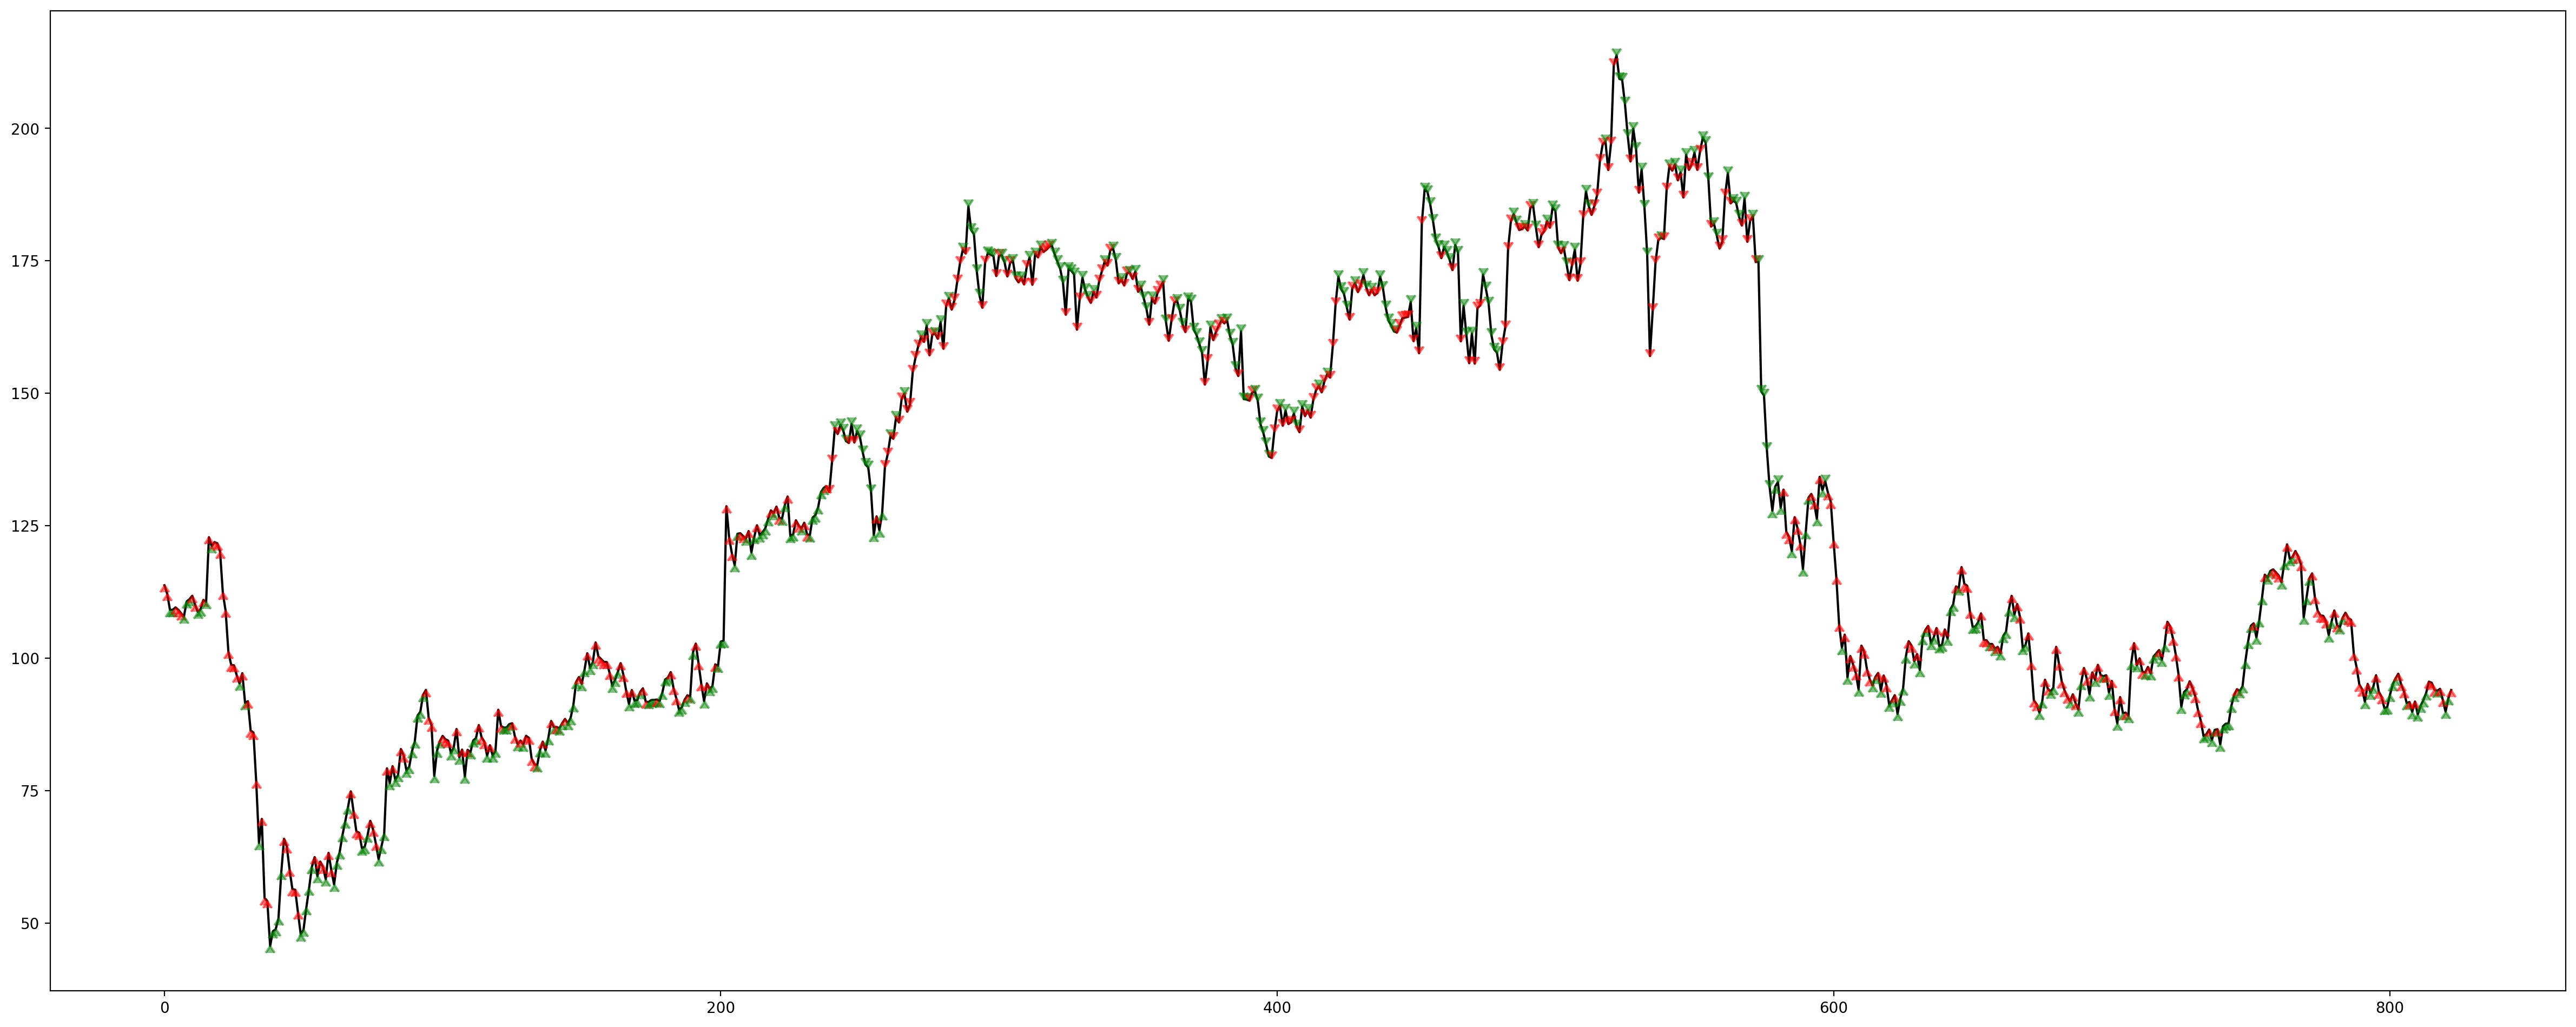

In [61]:
# Naive Bayes
classifier = GaussianNB()
bayesModel = classifier.fit(xTrain, yTrainClass) # train
yBayesPredict = bayesModel.predict(xTest)
bayesAccuracy = accuracy_score(yTestClass, yBayesPredict)

plt.figure(figsize=(30,12), dpi=dpiAmount)
data2 = data['Close'].iloc[-len(yTestClass):]
plt.plot(data2.reset_index(drop=True), color='black')
for idx, i in enumerate(data['Close'].iloc[-len(yTestClass):]):
    plt.scatter(idx, i, marker=getSymbols(yBayesPredict[idx]), color=getColors(yTestClass[idx], yBayesPredict[idx]), zorder=2, alpha=0.5)

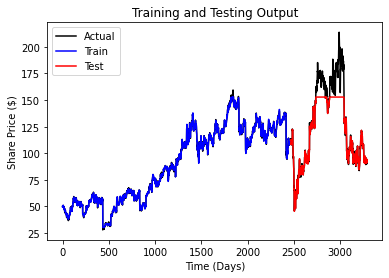

In [62]:
# KNN regression
knn = KNeighborsRegressor(n_neighbors=33).fit(xTrain, yTrainRegress)
knnModelRegress = knn.fit(xTrain, yTrainRegress)
trainKnnPredict = knnModelRegress.predict(xTrain)
yKnnPredict = knnModelRegress.predict(xTest)

testPredictKnnPlot = np.empty_like(data['Close'])
testPredictKnnPlot[:] = np.nan
testPredictKnnPlot[len(trainKnnPredict):len(data)] = yKnnPredict

# Plot the test predictions
plt.plot(data['Close'], color="black", label=f"Actual")
plt.plot(trainKnnPredict, color="blue", label=f"Train")
plt.plot(testPredictKnnPlot, color="red", label=f"Test")
plt.title("Training and Testing Output")
plt.xlabel("Time (Days)")
plt.ylabel("Share Price ($)")
plt.legend()
plt.show()

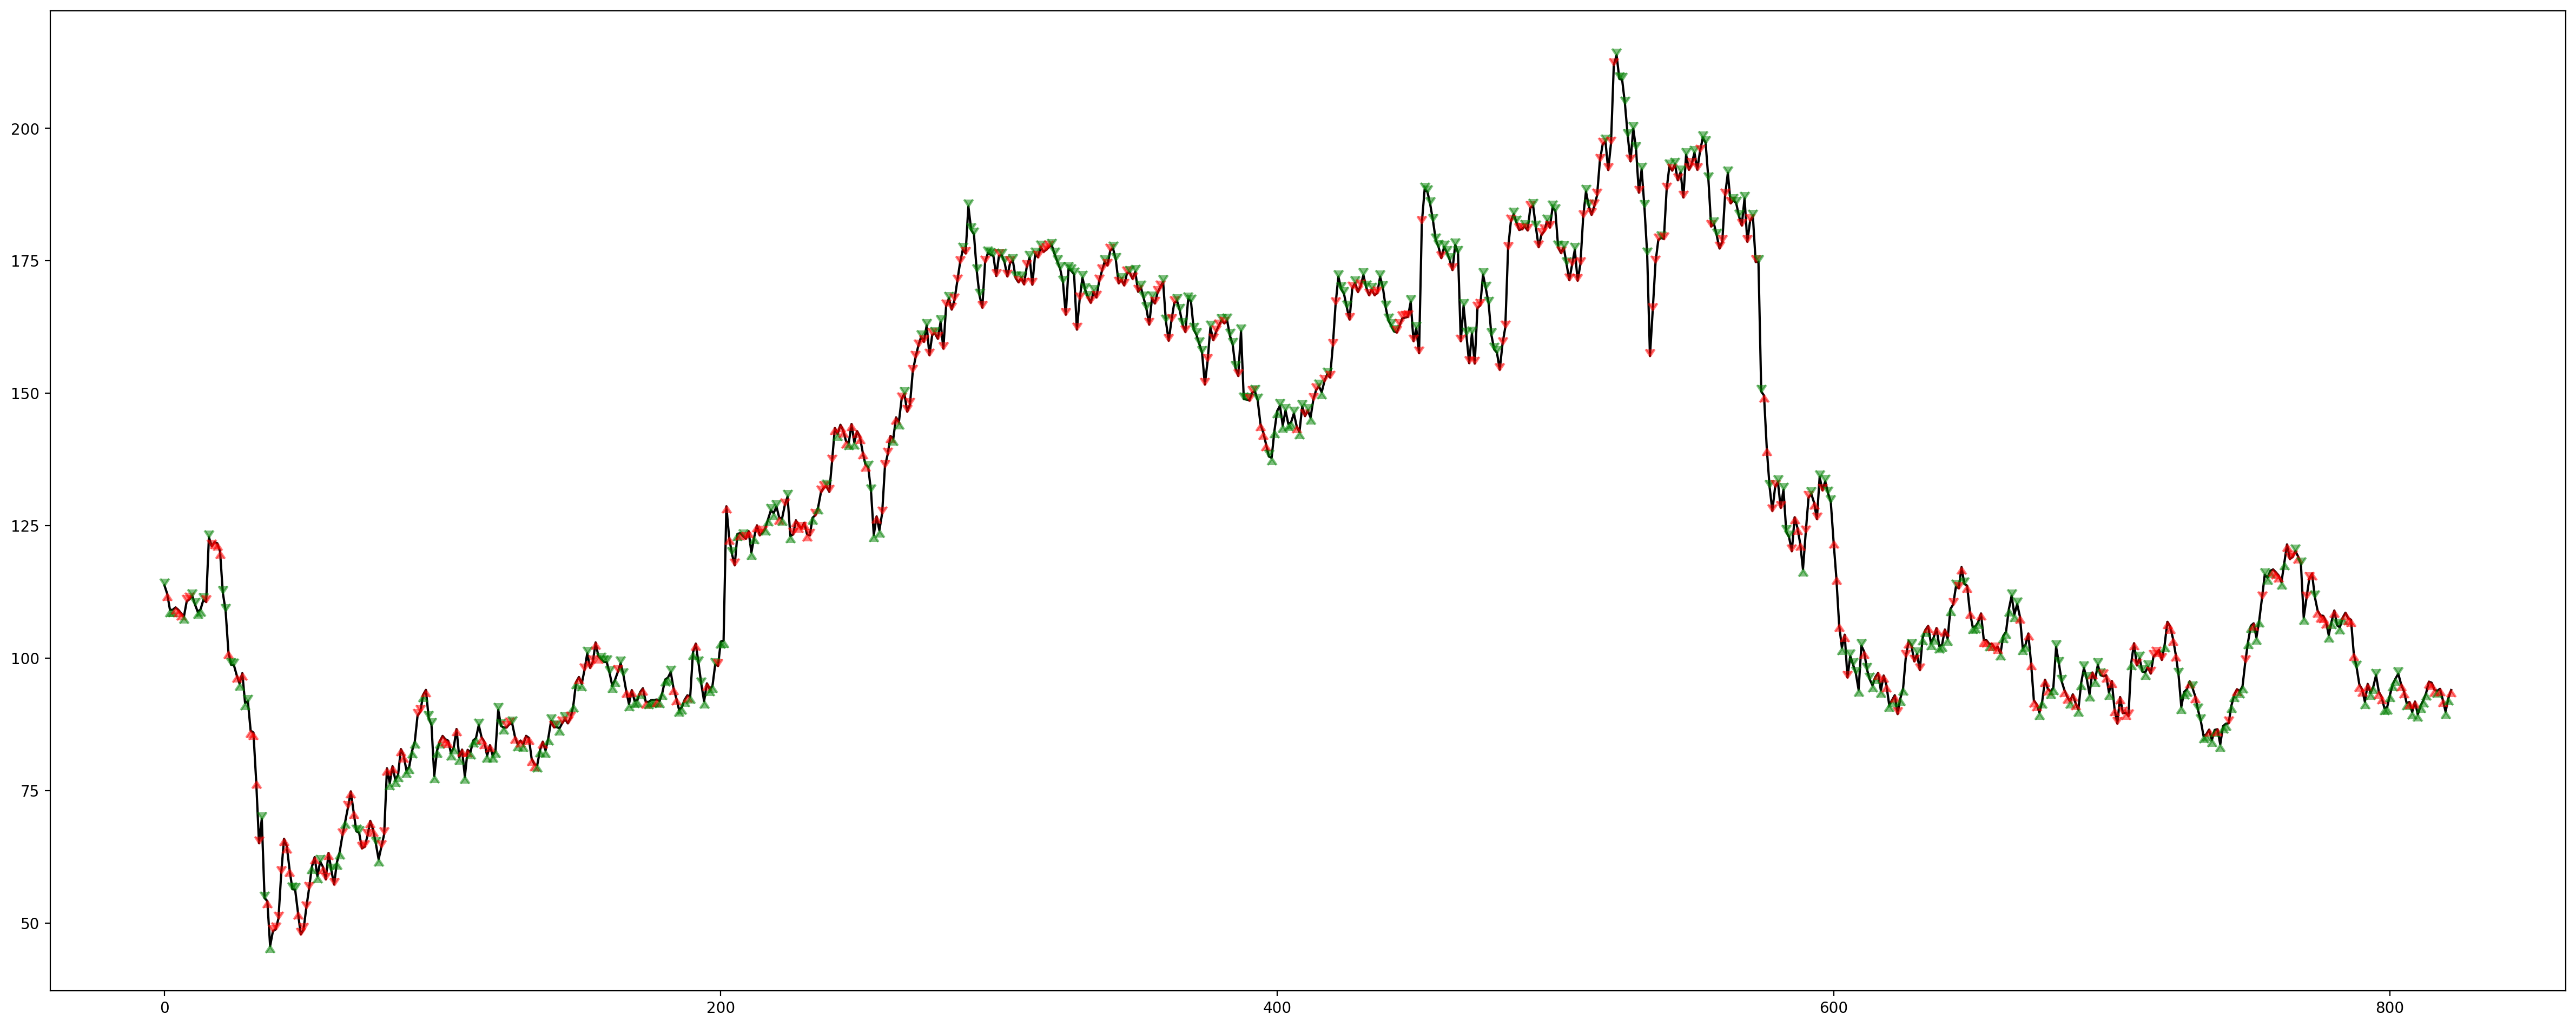

In [63]:
# KNN classifier - best k-value I've found: 33
knnModel = KNeighborsClassifier(n_neighbors=33).fit(xTrain, yTrainClass)
yKnnPredict = knnModel.predict(xTest)
knnAccuracy = accuracy_score(yTestClass, yKnnPredict)

plt.figure(figsize=(30,12), dpi=dpiAmount)
data2 = data['Close'].iloc[-len(yTestClass):]
plt.plot(data2.reset_index(drop=True), color='black')
for idx, i in enumerate(data['Close'].iloc[-len(yTestClass):]):
    plt.scatter(idx, i, marker=getSymbols(yKnnPredict[idx]), color=getColors(yTestClass[idx], yKnnPredict[idx]), zorder=2, alpha=0.5)

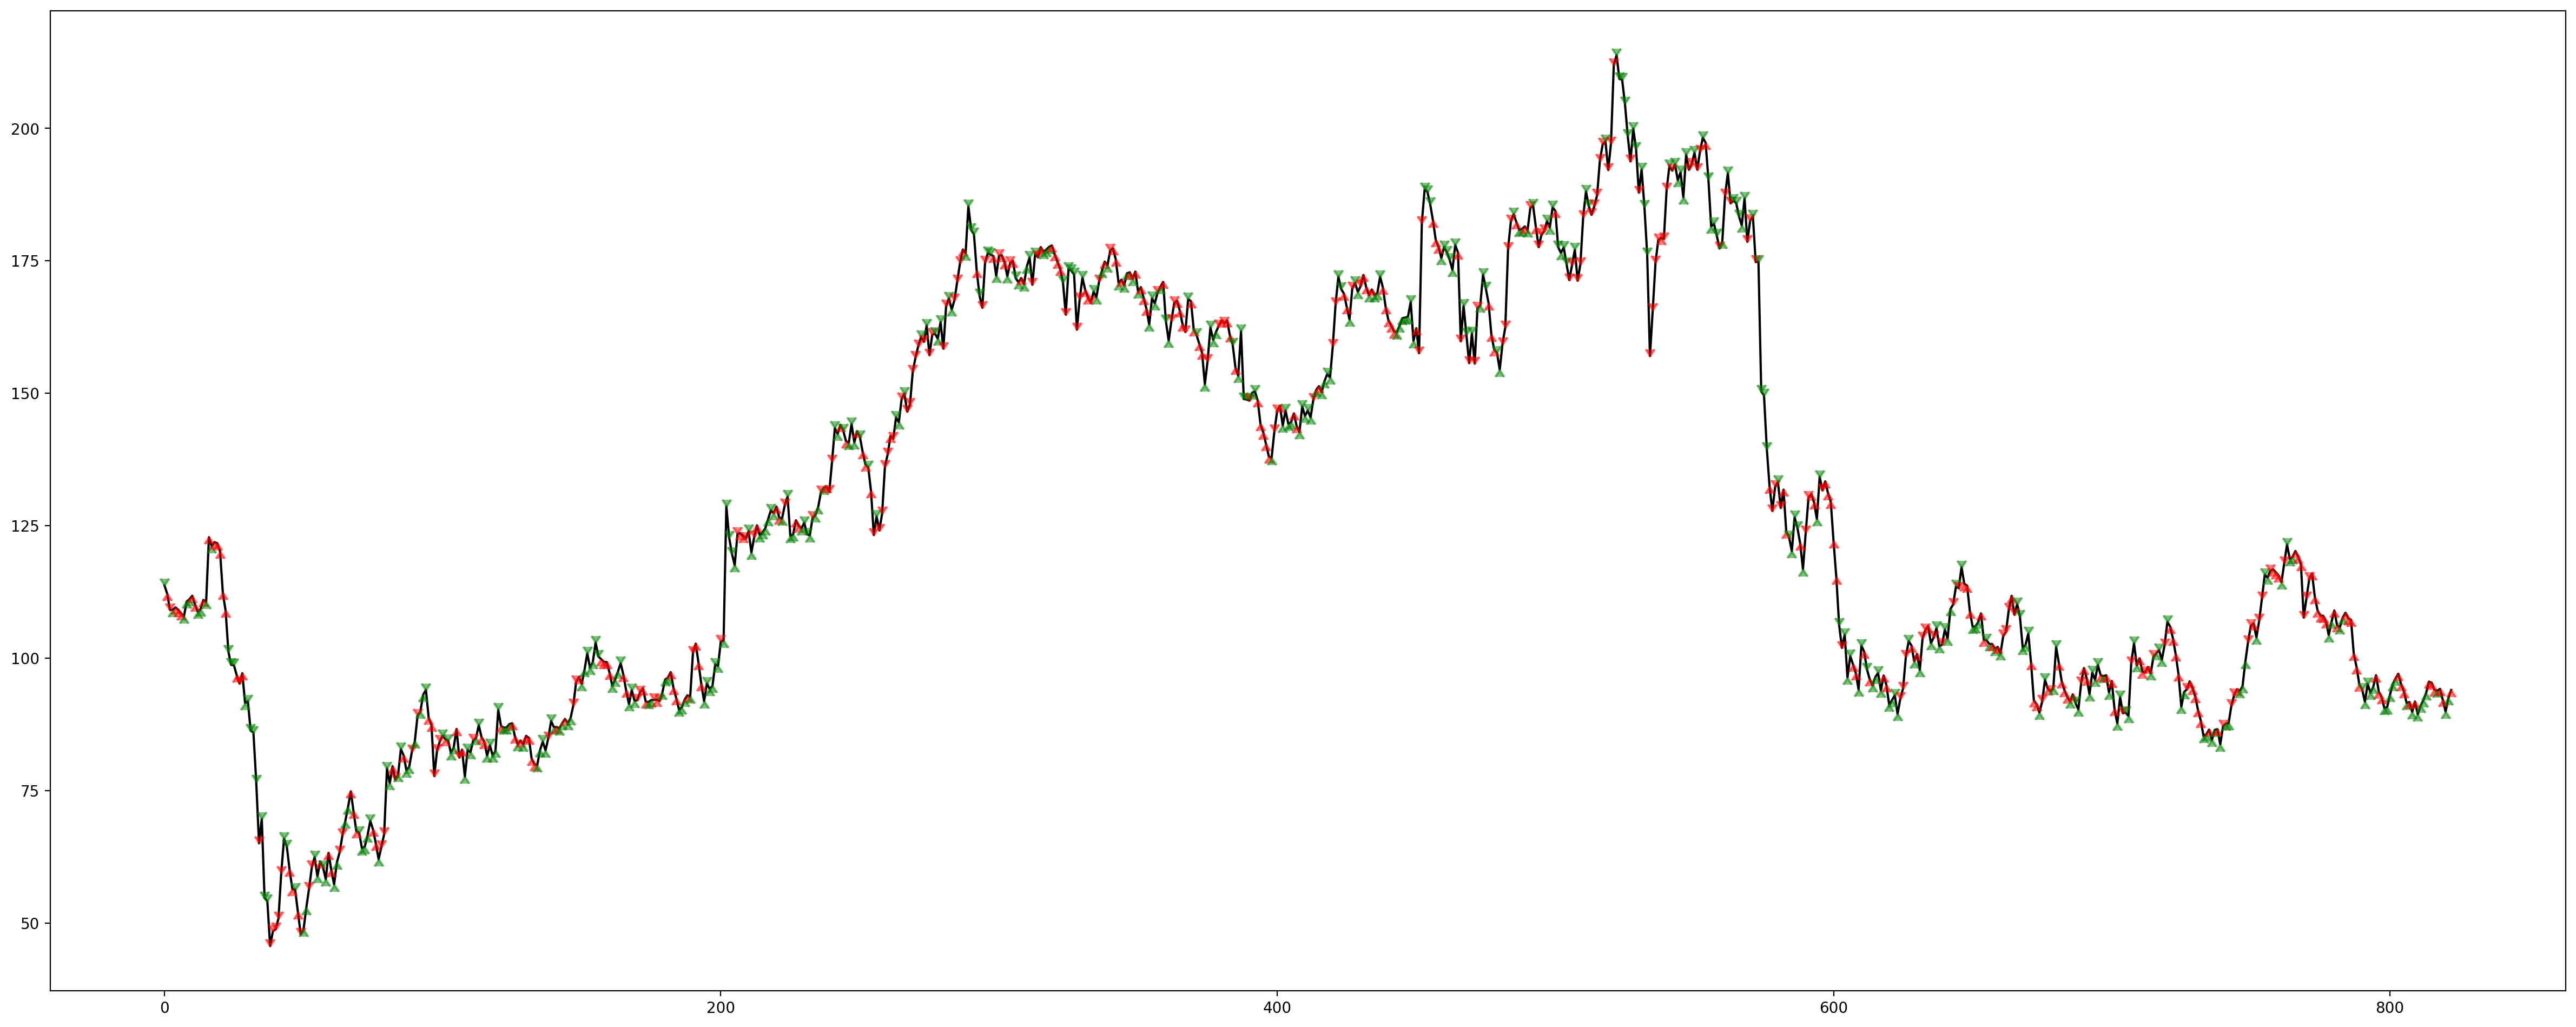

In [64]:
# LinearSVC for a large dataset
svc = LinearSVC() # support vector classifier
svcModel = svc.fit(xTrain, yTrainClass)
svcPredict = svcModel.predict(xTest)
svcAccuracy = accuracy_score(yTestClass, svcPredict)

plt.figure(figsize=(30,12), dpi=dpiAmount)
data2 = data['Close'].iloc[-len(yTestClass):]
plt.plot(data2.reset_index(drop=True), color='black')
for idx, i in enumerate(data['Close'].iloc[-len(yTestClass):]):
    plt.scatter(idx, i, marker=getSymbols(svcPredict[idx]), color=getColors(yTestClass[idx], svcPredict[idx]), zorder=2, alpha=0.5)

In [65]:
# Perceptron
percep = Perceptron()
percepModel = percep.fit(xTrain, yTrainClass)
percepPredict = percepModel.predict(xTest)
percepAccuracy = accuracy_score(yTestClass, percepPredict)

plt.figure(figsize=(30,12), dpi=600)
data2 = data['Close'].iloc[-len(yTestClass):]
plt.plot(data2.reset_index(drop=True), color='black')
for idx, i in enumerate(data['Close'].iloc[-len(yTestClass):]):
    plt.scatter(idx, i, marker=getSymbols(percepPredict[idx]), color=getColors(yTestClass[idx], percepPredict[idx]), zorder=2, alpha=0.5)

In [66]:
# Predict 1 day into the future using all models
# Generalize and print out all the info a data analyst/stock investor may want to know from our models
from statistics import mode

svcPredict = svcModel.predict(xTest[-1:])[0]
percepPredict = percepModel.predict(xTest[-1:])[0]
knnPredict = knnModel.predict(xTest[-1:])[0]
randomForestsPredict = rFModel.predict(xTest[-1:])[0]
bayesPredict = bayesModel.predict(xTest[-1:])[0]
overallPredictions = [svcPredict, percepPredict, knnPredict, randomForestsPredict, bayesPredict]

rfNumericalPredict = rFRegress.predict(xTest[-1:])[0]
knnNumericalPredict = knnModelRegress.predict(xTest[-1:])[0]

currentStockPrice = yTestRegress[-1:].to_string(index=False)
currentStockPrice = "${:,.2f}".format(float(currentStockPrice))
print("Current Stock price: " + currentStockPrice)
print("Overall Future Direction Prediction: " + str(mode(overallPredictions)))

print("\nModel Predictions - ")
print("Random Forests: " + str(randomForestsPredict))
print("Naive Bayes: " + str(bayesPredict))
print("KNN: " + str(knnPredict))
print("SVC: " + str(svcPredict))
print("Perceptron: " + str(percepPredict))

rfNumericalPredict = "${:,.2f}".format(rfNumericalPredict)
knnNumericalPredict = "${:,.2f}".format(knnNumericalPredict)
print("\nFuture Stock Price Closing Estimates - ")
print("Random Forests: " + str(rfNumericalPredict))
print("KNN: " + str(knnNumericalPredict))

overallAccuracies = [rfAccuracy, bayesAccuracy, knnAccuracy, svcAccuracy, percepAccuracy]
print("\nAccuracy Scores - ")
print("Random Forests:", "{0:.2%}".format(rfAccuracy))
print("Naive Bayes:", "{0:.2%}".format(bayesAccuracy))
print("KNN:", "{0:.2%}".format(knnAccuracy))
print("SVC:", "{0:.2%}".format(svcAccuracy))
print("Perceptron:", "{0:.2%}".format(percepAccuracy))
print("Best Accuracey:", "{0:.2%}".format(max(overallAccuracies)))

Current Stock price: $93.96
Overall Future Direction Prediction: Up

Model Predictions - 
Random Forests: Up
Naive Bayes: Up
KNN: Up
SVC: Up
Perceptron: Up

Future Stock Price Closing Estimates - 
Random Forests: $93.99
KNN: $93.77

Accuracy Scores - 
Random Forests: 51.15%
Naive Bayes: 51.40%
KNN: 51.88%
SVC: 49.94%
Perceptron: 50.79%
Best Accuracey: 51.88%
